K-means Clustering | Mean-shift Algorithm | Ruchi Manikrao Dhore | W1652116

K-means


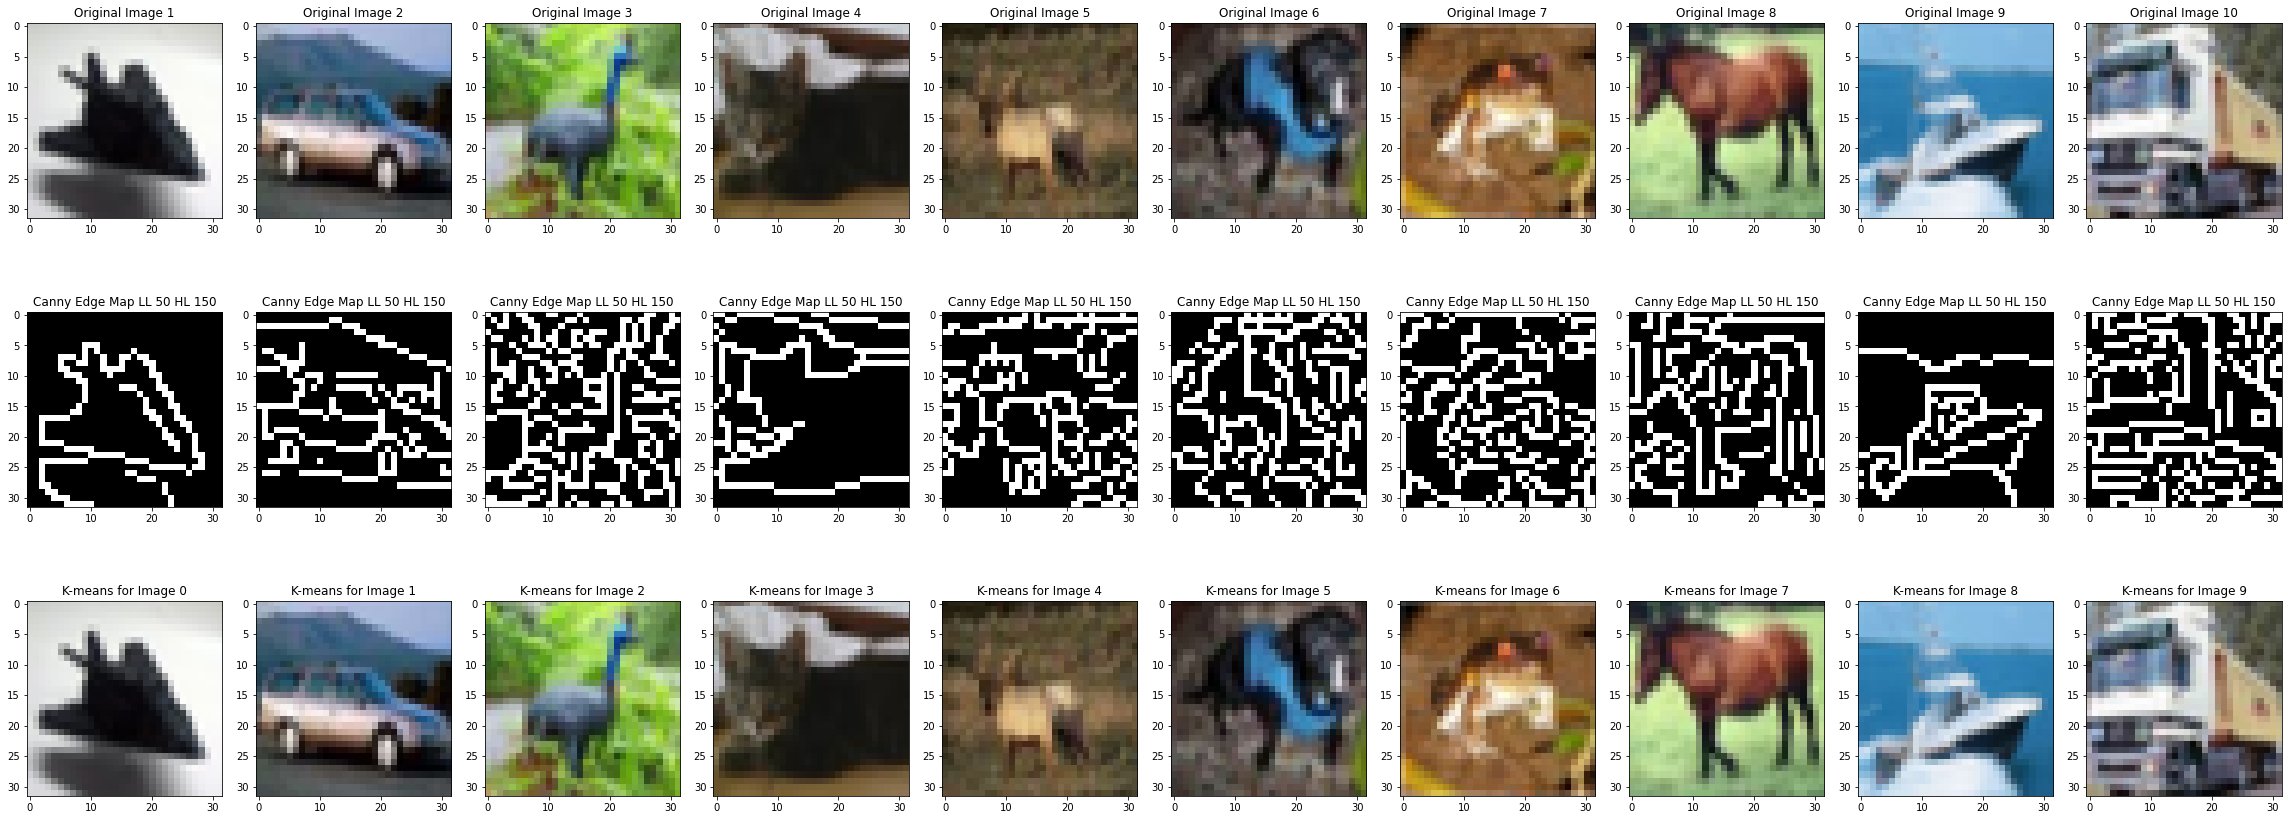

In [2]:
import cv2
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

input_range = 10

# To store images from cifar10 10 classes
input_image_dataset = []
canny_edge_map_dataset = []

# To load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# To get the first image from every class in the training set
for i in range(input_range):
  first_image_index = next((index for index, label in enumerate(y_train) if label[0] == i), None)
  input_image_dataset.append(x_train[first_image_index])

# To plot original images
figure = plt.figure(figsize = (32, 32))
figure.tight_layout()

for i in range(input_range):
  plt.subplot(8, 10, i + 1)
  plt.imshow(input_image_dataset[i])
  plt.title("Original Image " + str(i+1))

# To calculate canny edge map
def canny_edge_detector(image, low_threshold = 10, high_threshold = 100):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  canny_edge_map = cv2.Canny(gray, low_threshold, high_threshold)
  return canny_edge_map

# To plot canny edge map
def plot(canny_edge_map, index = 10, low_threshold = 10, high_threshold = 100):
  plt.subplot(8, 10, (i + 1) + index)
  figure.tight_layout()
  plt.imshow(canny_edge_map, cmap = 'gray')
  plt.title("Canny Edge Map LL {} HL {}".format(str(low_threshold), str(high_threshold)))

# To provoke canny edge detector
for i in range(input_range):
  canny_edge_map = canny_edge_detector(input_image_dataset[i], 50, 150)
  plot(canny_edge_map, 10, 50, 150)
  canny_edge_map_dataset.append(canny_edge_map)

for i in range(input_range):
  # To reshape the image into a 2D array of pixels
  img_2D = input_image_dataset[i].reshape((-1,3))

  # To perform k-means clustering on the pixel values
  kmeans = KMeans(n_clusters=2, random_state=0).fit(img_2D)

  # To assign each pixel to its corresponding cluster center
  labels = kmeans.labels_

  # To reshape the labels back to the original image shape
  labels = labels.reshape(input_image_dataset[i].shape[0], input_image_dataset[i].shape[1])

  # To create a mask for each cluster
  mask0 = np.where(labels == 0, 255, 0).astype('uint8')
  mask1 = np.where(labels == 1, 255, 0).astype('uint8')
  mask2 = np.where(labels == 2, 255, 0).astype('uint8')

  # To apply the masks to the original image to show the segmentation
  result = cv2.bitwise_and(input_image_dataset[i], input_image_dataset[i], mask=mask0)
  result += cv2.bitwise_and(input_image_dataset[i], input_image_dataset[i], mask=mask1)
  result += cv2.bitwise_and(input_image_dataset[i], input_image_dataset[i], mask=mask2)

  # To plot
  plt.subplot(8, 10, (i + 1) + 20)
  figure.tight_layout()
  plt.imshow(result)
  plt.title("K-means for Image {}".format(str(i)))


Mean-shift

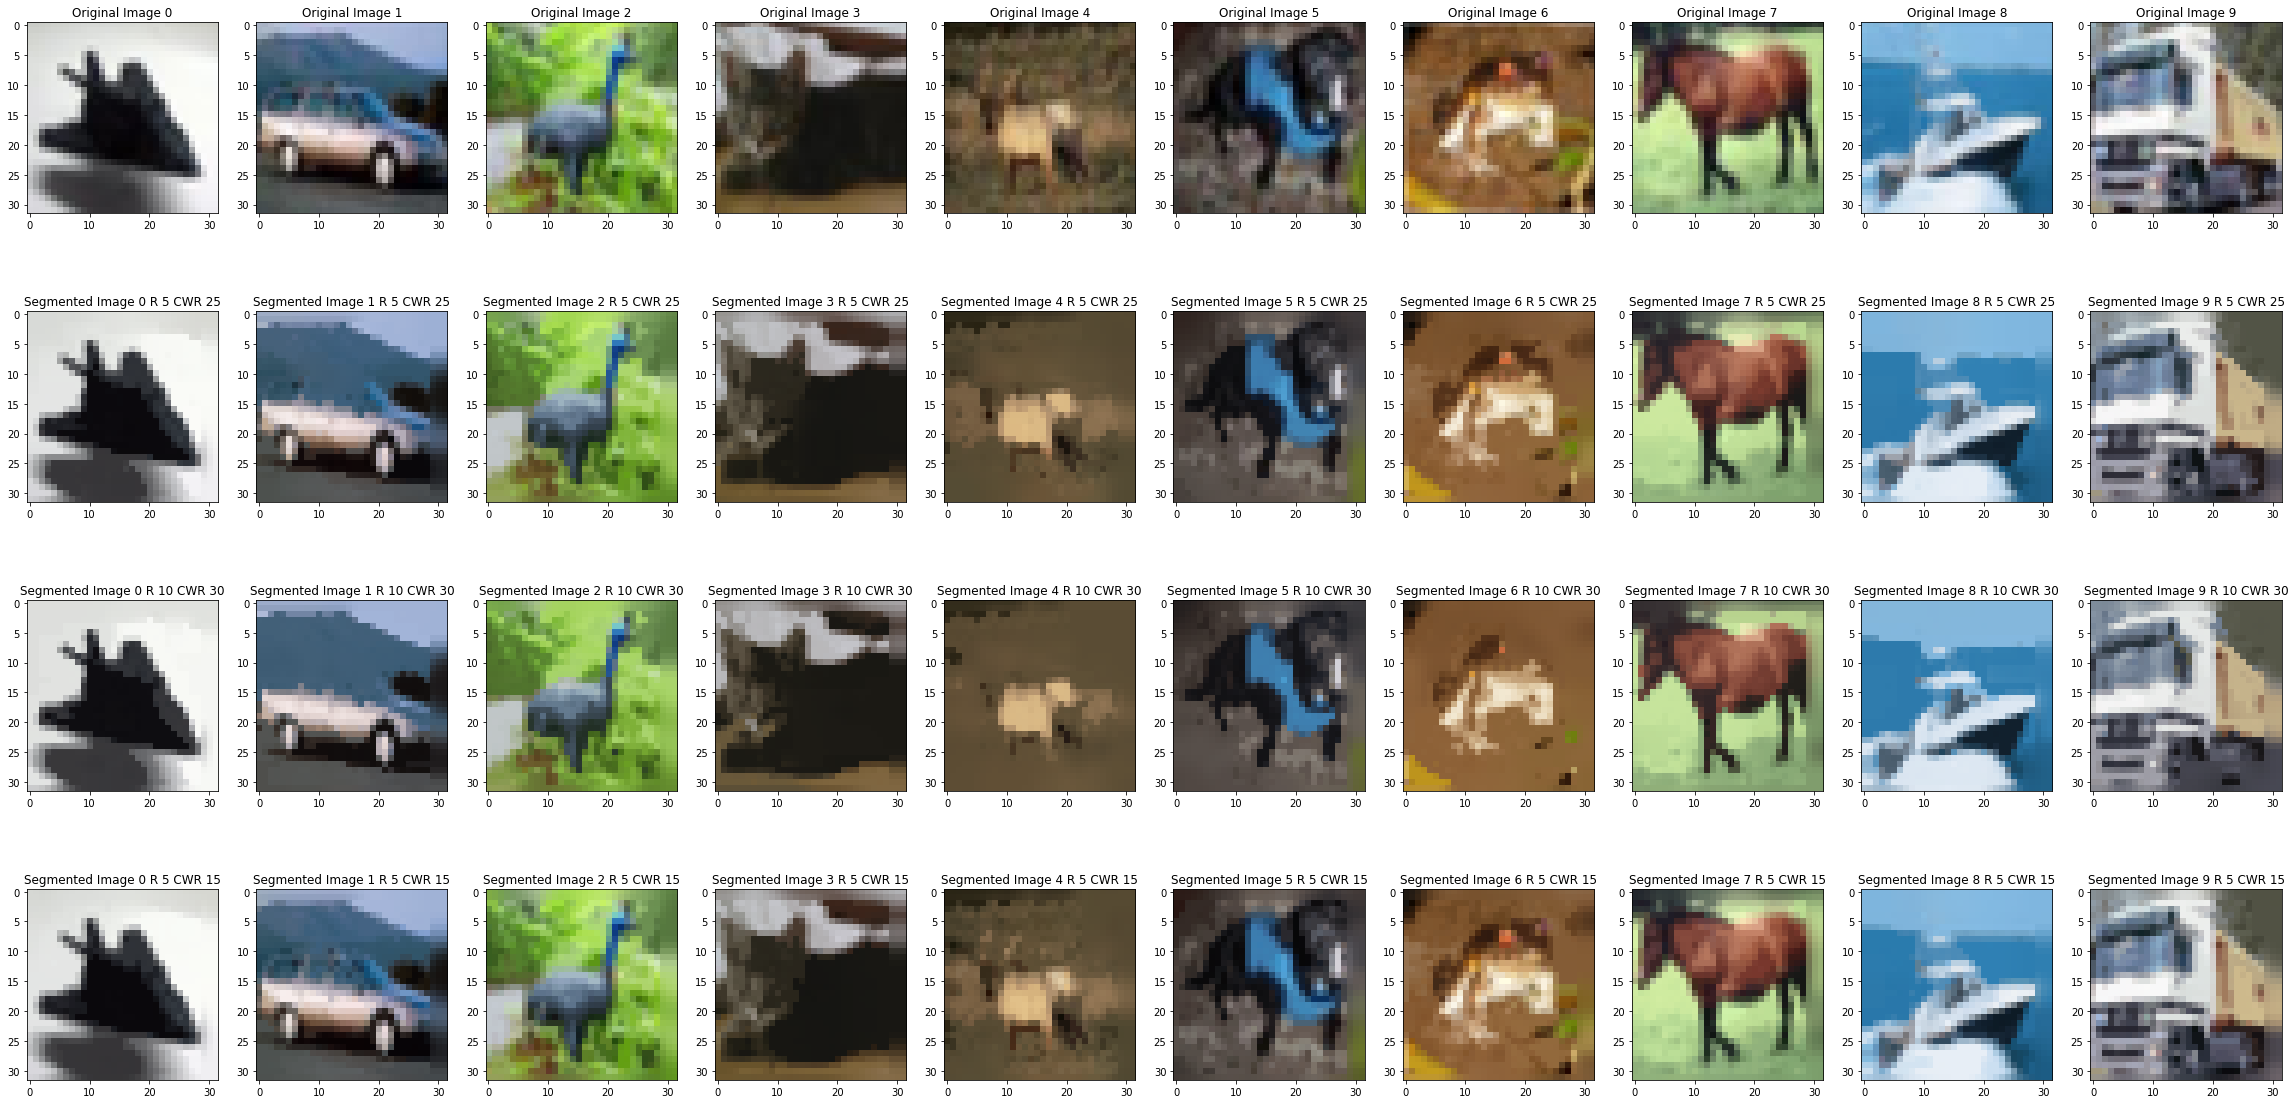

In [6]:
# To plot original images
figure = plt.figure(figsize = (32, 32))
figure.tight_layout()

for i in range(input_range):
  plt.subplot(8, 10, i + 1)
  plt.imshow(input_image_dataset[i])
  plt.title("Original Image {}".format(str(i)))

def mean_shift(image, index, offset, window_radius, color_window_radius):
  # To apply the mean shift filter with a spatial window radius and a color window radius
  shifted = cv2.pyrMeanShiftFiltering(image, window_radius, color_window_radius)

  # To display the segmented images
  plt.subplot(8, 10, (index + 1) + offset)
  figure.tight_layout()
  plt.imshow(shifted)
  plt.title("Segmented Image {} R {} CWR {}".format(str(index), str(window_radius), str(color_window_radius)))

# To invoke mean shift with different values of window radius and color window radius
for i in range(input_range):
    mean_shift(input_image_dataset[i], i, 10, 5, 25)
    mean_shift(input_image_dataset[i], i, 20, 10, 30)
    mean_shift(input_image_dataset[i], i, 30, 5, 15)
